In [2]:
#共轭梯度法
import numpy as np
import matplotlib.pyplot as plt


def ConjugateGradient(A, x, b): 
    global k_all, x_all
    
    k = 0
    r = b - np.dot(A,x)
    d = r
    k_all = []
    x_all = []
    while True:   
        k+=1        
        alpha = np.linalg.norm(r)**2 / np.vdot(np.dot(A,d),d)        
        x = x + alpha * d
        old_r = r
        r = b - np.dot(A,x)
        f = 1/2 * np.dot(np.dot(x.T,A),x) - np.dot(b.T, x) 
        print("第",k,"次迭代:",f)
        k_all.append(k)
        x_all.append(x)
               
        if np.linalg.norm(r) < 1e-6:
            print("conjugate gradient finished!")
            return x
            
        else:
            beta = np.linalg.norm(r)**2/np.linalg.norm(old_r)**2            
            d = r + beta * d  
                       

A = np.array([[ 56,   5,  -2,  12,   9,  -5, -10,  11,   1, -12],
           [  5,  58,  -1,  10,   3, -11,  -4, -16, -17,   5],
           [ -2,  -1,  67,   9,  10,  -4,  -6,   6,   6,  -1],
           [ 12,  10,   9,  37,  22,   9,  15,  -1,   1, -9],
           [  9,   3,  10,  22,  64,  -8,  -4, -11,   3,   0],
           [ -5, -11,  -4,   9,  -8,  62,   4,   9,  -5,  -1],
           [-10,  -4,  -6,  15,  -4,   4,  43,   4,   3,  -3],
           [ 11, -16,   6,  -1, -11,   9,   4,  43, -16,  -3],
           [  1, -17,   6,   1,   3,  -5,   3, -16,  61,   2],
           [-12,   5,  -1,  -9,   0,  -1,  -3,  -3,   2,  57]])

x = np.array([[1,1,1,1,1,1,1,1,1,1]]).T
b = np.array([[2, 6, 3, 8, -1, 9, 2, 13, 15,-9]]).T
ConjugateGradient(A, x, b)

loss_all = []

for x in x_all:
    loss = np.linalg.norm(x - x_all[-1])
    loss_all.append(loss)

plt.plot(k_all, loss_all)
plt.xlabel("k")
plt.ylabel("loss")   
plt.savefig('ConjugateGradient.png')

第 1 次迭代: [[10.75325608]]
第 2 次迭代: [[-10.74230282]]
第 3 次迭代: [[-12.55740652]]
第 4 次迭代: [[-13.34753309]]
第 5 次迭代: [[-13.83649208]]
第 6 次迭代: [[-13.86602484]]
第 7 次迭代: [[-13.88567585]]
第 8 次迭代: [[-13.88601932]]
第 9 次迭代: [[-13.88603251]]
第 10 次迭代: [[-13.88603272]]
conjugate gradient finished!


In [22]:
B = np.array([[54.4148,   14.0102,    3.3389,  -10.4064,   12.7768,    5.4789,   -6.8899,    1.0777,   -4.2629,   -7.5950,   -4.7607,    6.7881,    0.5253,   -5.7493,    2.6454],
   [14.0102,   76.0312,   -7.0798,    8.6140 ,  -6.9071,   -4.9189,   -5.6065,   -2.0132 ,   7.9625 ,   2.9175  , -8.3090,    5.0461  , -6.7429 ,  -6.5397  ,  5.5729],
   [ 3.3389,   -7.0798,   44.8466,   -1.1732 ,   6.1209,    1.6076,    4.1897,   -5.8476 ,  -1.1699 ,   1.9264  , -2.4792,    6.8127  , -1.1469 ,  -1.4573  , 14.6538],
  [-10.4064,    8.6140,  -1.1732 ,  65.8557  ,  5.6789 ,   2.9954 ,  -6.9253 ,  -0.1134  , -1.5750  , -7.6821   , 3.0182 ,   5.5969  , 10.1356  , 11.5483   ,-4.2196],
   [12.7768,   -6.9071,    6.1209,    5.6789 ,  49.8201,   -0.9248,   -3.2486,  -13.2060 ,   7.2604 ,  -9.7817  ,  3.6617,   -0.8268 ,  -7.1060 ,   8.0359  , -0.3877],
    [5.4789,   -4.9189,   1.6076 ,   2.9954  , -0.9248 ,  23.2970 , -11.9230 ,   3.9257  , -3.8147  ,  2.8527   , 1.7329 ,   4.4663  , -2.9456  ,  7.9390   , 1.8935],
   [-6.8899,   -5.6065,    4.1897,   -6.9253 ,  -3.2486,  -11.9230,   51.1182,   -7.9026 ,  15.6403 ,  -1.3286 , -10.4260,   14.0065 ,  10.6887 ,   1.3036 ,   3.8249],
    [1.0777,   -2.0132,   -5.8476,   -0.1134 , -13.2060,    3.9257,   -7.9026,   40.3484 ,   1.4814 ,  -5.8118 ,  -9.2936 ,   4.1534 ,  -3.9220 ,   3.8163 ,  17.1825],
   [-4.2629,    7.9625,   -1.1699,   -1.5750 ,   7.2604,   -3.8147,   15.6403,    1.4814 ,  54.2596 ,   2.8612 , -10.6545  ,  4.4582 ,  -1.9706 , -10.7524 ,  -3.9517],
   [-7.5950,    2.9175,    1.9264,   -7.6821 ,  -9.7817,    2.8527,   -1.3286,   -5.8118 ,   2.8612 ,  53.3852 ,  -2.6132 , -14.4152 ,   6.0334 ,  -6.3332 ,   3.6946],
   [-4.7607,   -8.3090,   -2.4792,    3.0182 ,   3.6617,    1.7329,  -10.4260,   -9.2936 , -10.6545 ,  -2.6132 ,  68.4498  ,  1.8739 ,  -3.4297 , -10.9281 ,  13.7019],
    [6.7881,    5.0461,    6.8127,    5.5969 ,  -0.8268,    4.4663,   14.0065,    4.1534  ,  4.4582 , -14.4152  ,  1.8739 ,  58.0143 ,  -0.6587  ,  7.9346  ,  3.6518],
    [0.5253,   -6.7429,   -1.1469,   10.1356 ,  -7.1060,   -2.9456,   10.6887,   -3.9220 ,  -1.9706 ,   6.0334 ,  -3.4297 ,  -0.6587 ,  48.2677 ,   9.3194 ,   5.6670],
   [-5.7493,   -6.5397,   -1.4573,   11.5483,    8.0359,    7.9390,    1.3036,    3.8163 , -10.7524 ,  -6.3332 , -10.9281  ,  7.9346 ,   9.3194 ,  42.7293 ,  -6.6082],
    [2.6454,    5.5729,   14.6538,   -4.2196,   -0.3877 ,   1.8935,    3.8249,   17.1825,   -3.9517 ,   3.6946,   13.7019   , 3.6518 ,   5.6670  , -6.6082 ,  50.5094]])
C = []
for i in B:
    for j in i:
        j = int(j)
        C.append(j)

D = np.array(C)
E = D.reshape(15,15)
E


array([[ 54,  14,   3, -10,  12,   5,  -6,   1,  -4,  -7,  -4,   6,   0,
         -5,   2],
       [ 14,  76,  -7,   8,  -6,  -4,  -5,  -2,   7,   2,  -8,   5,  -6,
         -6,   5],
       [  3,  -7,  44,  -1,   6,   1,   4,  -5,  -1,   1,  -2,   6,  -1,
         -1,  14],
       [-10,   8,  -1,  65,   5,   2,  -6,   0,  -1,  -7,   3,   5,  10,
         11,  -4],
       [ 12,  -6,   6,   5,  49,   0,  -3, -13,   7,  -9,   3,   0,  -7,
          8,   0],
       [  5,  -4,   1,   2,   0,  23, -11,   3,  -3,   2,   1,   4,  -2,
          7,   1],
       [ -6,  -5,   4,  -6,  -3, -11,  51,  -7,  15,  -1, -10,  14,  10,
          1,   3],
       [  1,  -2,  -5,   0, -13,   3,  -7,  40,   1,  -5,  -9,   4,  -3,
          3,  17],
       [ -4,   7,  -1,  -1,   7,  -3,  15,   1,  54,   2, -10,   4,  -1,
        -10,  -3],
       [ -7,   2,   1,  -7,  -9,   2,  -1,  -5,   2,  53,  -2, -14,   6,
         -6,   3],
       [ -4,  -8,  -2,   3,   3,   1, -10,  -9, -10,  -2,  68,   1,  -3,
       

第 1 次迭代: [[10.75325608]]
第 2 次迭代: [[-8.86204433]]
第 3 次迭代: [[-11.9095919]]
第 4 次迭代: [[-12.72949547]]
第 5 次迭代: [[-13.11738546]]
第 6 次迭代: [[-13.36779043]]
第 7 次迭代: [[-13.53433277]]
第 8 次迭代: [[-13.64617809]]
第 9 次迭代: [[-13.72172627]]
第 10 次迭代: [[-13.77305921]]
第 11 次迭代: [[-13.80809624]]
第 12 次迭代: [[-13.83212001]]
第 13 次迭代: [[-13.84864866]]
第 14 次迭代: [[-13.86005925]]
第 15 次迭代: [[-13.86795626]]
第 16 次迭代: [[-13.87343501]]
第 17 次迭代: [[-13.87724279]]
第 18 次迭代: [[-13.87989382]]
第 19 次迭代: [[-13.8817418]]
第 20 次迭代: [[-13.88303153]]
第 21 次迭代: [[-13.88393244]]
第 22 次迭代: [[-13.88456225]]
第 23 次迭代: [[-13.88500282]]
第 24 次迭代: [[-13.88531117]]
第 25 次迭代: [[-13.88552707]]
第 26 次迭代: [[-13.88567829]]
第 27 次迭代: [[-13.88578425]]
第 28 次迭代: [[-13.88585851]]
第 29 次迭代: [[-13.88591056]]
第 30 次迭代: [[-13.88594705]]
第 31 次迭代: [[-13.88597263]]
第 32 次迭代: [[-13.88599058]]
第 33 次迭代: [[-13.88600316]]
第 34 次迭代: [[-13.88601198]]
第 35 次迭代: [[-13.88601817]]
第 36 次迭代: [[-13.88602251]]
第 37 次迭代: [[-13.88602556]]
第 38 次迭代: [[-1

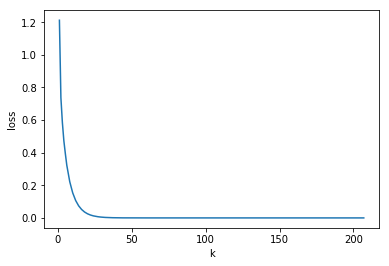

In [12]:
#最速下降法
import numpy as np
import matplotlib.pyplot as plt

def SteepestDescent(A, x, b):
    global x_all, k_all
    x_all = [] 
    k_all = []
    k = 0
    gradient = np.dot(A, x) - b
    
    while True:
        k +=1
        alpha = np.dot(gradient.T, gradient) / np.dot(np.dot(gradient.T, A), gradient)
        old_x = x
        x = old_x - alpha * gradient
        gradient = np.dot(A, x) - b
        f = 1/2 * np.dot(np.dot(x.T,A),x) - np.dot(b.T, x) 
        print("第",k,"次迭代:",f)
        x_all.append(x)
        k_all.append(k)
        if np.linalg.norm(x - old_x) <1e-16:
            print("Gradient Descent Fishend!")
            return x
        
A = np.array([[ 56,   5,  -2,  12,   9,  -5, -10,  11,   1, -12],
           [  5,  58,  -1,  10,   3, -11,  -4, -16, -17,   5],
           [ -2,  -1,  67,   9,  10,  -4,  -6,   6,   6,  -1],
           [ 12,  10,   9,  37,  22,   9,  15,  -1,   1, -9],
           [  9,   3,  10,  22,  64,  -8,  -4, -11,   3,   0],
           [ -5, -11,  -4,   9,  -8,  62,   4,   9,  -5,  -1],
           [-10,  -4,  -6,  15,  -4,   4,  43,   4,   3,  -3],
           [ 11, -16,   6,  -1, -11,   9,   4,  43, -16,  -3],
           [  1, -17,   6,   1,   3,  -5,   3, -16,  61,   2],
           [-12,   5,  -1,  -9,   0,  -1,  -3,  -3,   2,  57]])

x = np.array([[1,1,1,1,1,1,1,1,1,1]]).T
b = np.array([[2, 6, 3, 8, -1, 9, 2, 13, 15,-9]]).T      
SteepestDescent(A, x, b)        

loss_all = []

for x in x_all:
    loss = np.linalg.norm(x - x_all[-1])
    loss_all.append(loss)
    
plt.plot(k_all, loss_all)
plt.xlabel("k")
plt.ylabel("loss")
plt.savefig('SteepestDescent.png')

第 0 次迭代: [[-0.31704918]
 [ 0.57577052]
 [-0.13709436]
 [ 0.11684474]
 [ 0.10757077]
 [ 0.1461028 ]
 [-0.18187742]
 [ 0.86721983]
 [ 0.67423075]
 [-0.24412747]] [[-13.88603272]]
第 1 次迭代: [[-0.31704918]
 [ 0.57577052]
 [-0.13709436]
 [ 0.11684474]
 [ 0.10757077]
 [ 0.1461028 ]
 [-0.18187742]
 [ 0.86721983]
 [ 0.67423075]
 [-0.24412747]] [[-13.88603272]]
Gradient Descent Fishend!


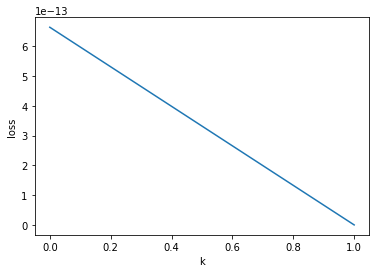

In [16]:
#牛顿法
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

def Newtown(A, x, b):
    global x_all, k_all
    x_all = []
    k_all = []
    k = -1
    gradient =  np.dot(A, x) - b
    
    while True:
        k+=1        
        old_x = x
        x = old_x - np.dot(np.linalg.inv(A) , gradient)
        gradient =  np.dot(A, x) - b
        f = 1/2 * np.dot(np.dot(x.T,A),x) - np.dot(b.T, x) 
        print("第",k,"次迭代:",x,f)
        x_all.append(x)
        k_all.append(k)
        if np.linalg.norm(x - old_x) < 1e-6:
            print("Gradient Descent Fishend!")
            return x,f

        
A = np.array([[ 56,   5,  -2,  12,   9,  -5, -10,  11,   1, -12],
           [  5,  58,  -1,  10,   3, -11,  -4, -16, -17,   5],
           [ -2,  -1,  67,   9,  10,  -4,  -6,   6,   6,  -1],
           [ 12,  10,   9,  37,  22,   9,  15,  -1,   1, -9],
           [  9,   3,  10,  22,  64,  -8,  -4, -11,   3,   0],
           [ -5, -11,  -4,   9,  -8,  62,   4,   9,  -5,  -1],
           [-10,  -4,  -6,  15,  -4,   4,  43,   4,   3,  -3],
           [ 11, -16,   6,  -1, -11,   9,   4,  43, -16,  -3],
           [  1, -17,   6,   1,   3,  -5,   3, -16,  61,   2],
           [-12,   5,  -1,  -9,   0,  -1,  -3,  -3,   2,  57]])

x = np.array([[1111,1,1111,1,1,1,1111,1,1,1]]).T
b = np.array([[2, 6, 3, 8, -1, 9, 2, 13, 15,-9]]).T
Newtown(A, x, b)

loss_all = []

for x in x_all:
    loss = np.linalg.norm(x - x_all[-1])
    loss_all.append(loss)
    
plt.plot(k_all, loss_all)
plt.xlabel("k")
plt.ylabel("loss")
plt.savefig('Newton.png')

In [13]:
1.00639618**2 + 1

2.0128332711185926